In [1]:
import tensorflow as tf

In [2]:
#https://github.com/zalandoresearch/fashion-mnist

fminst = tf.keras.datasets.fashion_mnist

In [3]:
#Load data
(training_images, training_labels), (test_images, test_labels) =fminst.load_data()

4422102/4422102 [==============================] - 0s 0us/step



# Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot


LABEL:9

IMAGE:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232

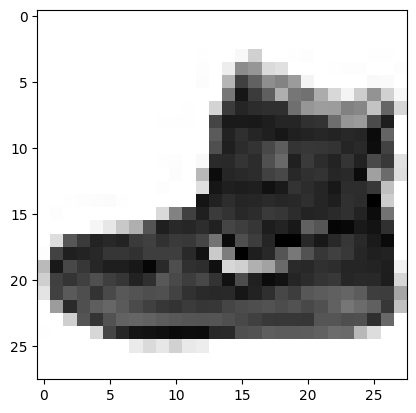

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#0 to 59999
index=0
#Set number of characters per rows when printing
np.set_printoptions(linewidth=320)

print(f'LABEL:{training_labels[index]}')
print(f'\nIMAGE:{training_images[index]}')

plt.imshow(training_images[index], cmap='Greys')


In [5]:
#Converrting 0 to 255 to 0 to 1 this processs is called normalization. Because to train neural network better
training_images= training_images/255.0
test_images=test_images/255.0

In [6]:
data_shape = training_images.shape
print(data_shape)

print(f"There are {data_shape[0]} examples with shape ({data_shape[1]}, {data_shape[2]})")

(60000, 28, 28)
There are 60000 examples with shape (28, 28)


In [7]:
#Building NN classsification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

**Sequential**: That defines a sequence of layers in the neural network.

**Flatten**: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

**Dense**: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

**ReLU** effectively means:

if x > 0:
  return x

else:
  return 0
In other words, it only passes values greater than 0 to the next layer in the network.

**Softmax** takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this lecture if you want to know more about the Softmax function and how the values are computed.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
from google.colab import auth
auth.authenticate_user()

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss')<0.04):
      print(f"\n Loss is low so cancelling train0ing")
      self.model.stop_training = True

In [10]:
#how Softmax works
inputs= np.array([[1.0,2.0,3.0,4.0]])
#Converting to tensor objects
inputs= tf.convert_to_tensor(inputs)
print(f'Input to Softmax:{inputs.numpy()}')

outputs= tf.keras.activations.softmax(inputs)
print(f'Output from Softmax:{outputs.numpy()}')

sum= tf.reduce_sum(outputs)
print(f'sum of outputs:{sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')


Input to Softmax:[[1. 2. 3. 4.]]
Output from Softmax:[[0.0320586  0.08714432 0.23688282 0.64391426]]
sum of outputs:1.0
class with highest probability: 3


In [11]:
callback= myCallback()


In [12]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss ="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=15,callbacks=[callback])

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5024 - accuracy: 0.8255
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3783 - accuracy: 0.8647
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3386 - accuracy: 0.8771
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3125 - accuracy: 0.8854
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2956 - accuracy: 0.8924
Epoch 6/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2823 - accuracy: 0.8947
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2687 - accuracy: 0.9008
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2576 - accuracy: 0.9051
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2478 - accuracy: 0.9074
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.24

In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8889


[0.33469390869140625, 0.8888999819755554]

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

In [14]:
classifications = model.predict(test_images)

print(classifications[0])
prediction_label = np.argmax(classifications[0])
print(prediction_label)

313/313 [==============================] - 1s 2ms/step
[2.2434778e-11 4.0596883e-14 5.2352300e-11 2.4408066e-14 2.4266006e-08 3.0639250e-05 3.2318298e-10 2.4593575e-04 1.0402938e-07 9.9972332e-01]
9


In [15]:
print(test_labels[0])

9


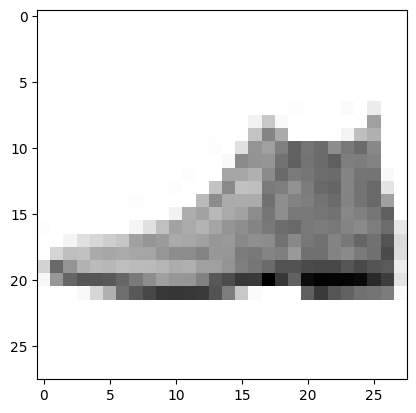

In [16]:
plt.imshow(test_images[0], cmap='Greys')


adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate.

# Using CNN to improve the accuracy
accuracy for the above model is about 89% on training and 87% on validation
Here we have Use Convolution and MaxPooling to improve the accuracy.

Look at the code again, and see, step by step how the convolutions were built. Instead of the input layer at the top, you added a Conv2D layer. The parameters are:

The number of convolutions you want to generate. The value here is purely arbitrary but it's good to use powers of 2 starting from 32.
The size of the Convolution. In this case, a 3x3 grid.
The activation function to use. In this case, you used a ReLU, which you might recall is the equivalent of returning x when x>0, else return 0.
In the first layer, the shape of the input data.

MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one. Thus, it turns 4 pixels into 1. It repeats this across the image, and in doing so, it halves both the number of horizontal and vertical pixels, effectively reducing the image to 25% of the original image.

In [17]:
model = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  #Here maxpool size = (2,2) and stride is not mention hence same as poolsize
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [18]:
print(test_labels[:100])


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 13, 13, 32) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 11, 11, 32) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 5, 5, 32) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 800) dtype=float32 (created by layer 'flatten_1')>, <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_2')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>]
1/1 [==============================] - 0s 42ms/step


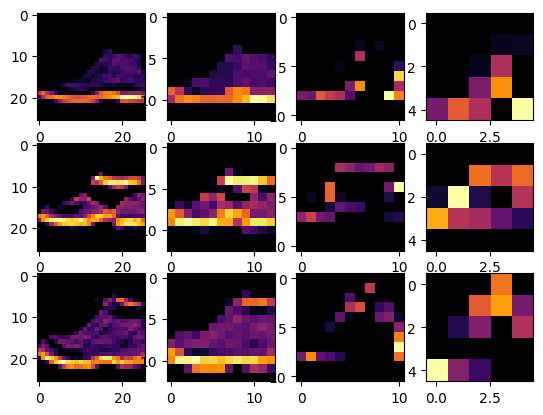

In [21]:
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
print(layer_outputs)
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)